# Codsoft Internship - Task 4
Build an AI model that can classify SMS messages as spam or legitimate. Use techniques like TF-IDF or word embeddings withclassifiers like Naive Bayes, Logistic Regression, or Support VectorMachines to identify spam messages

# Import the necessary libraries

In [1]:
import keras
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

C:\Users\harsh\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Load the data into Pandas dataframe

In [3]:
df = pd.read_csv("C:/Users/harsh/OneDrive/Desktop/Internship/Task-3/archive (1)/spam.csv",delimiter=',',encoding='latin-1')
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

Drop the columns that are not required for the neural network.

In [4]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


Understand the distribution better.

C:\Users\harsh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

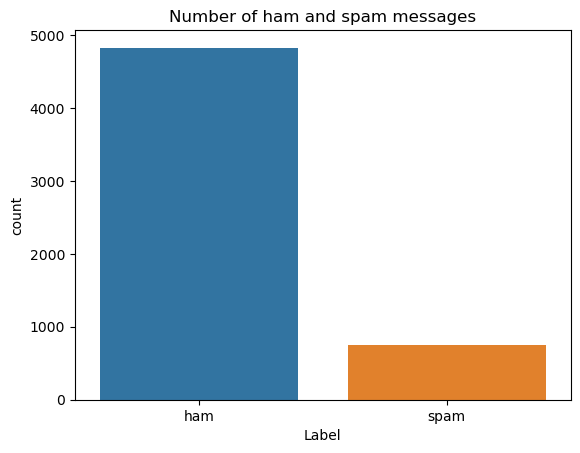

In [5]:
sns.countplot(df.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

* Create input and output vectors.
* Process the labels.

In [6]:
X = df.v2
Y = df.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

Split into training and test data.

In [7]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

### Process the data
* Tokenize the data and convert the text to sequences.
* Add padding to ensure that all the sequences have the same shape.
* There are many ways of taking the *max_len* and here an arbitrary length of 150 is chosen.

In [8]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

### RNN
Define the RNN structure.

In [9]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

Call the function and compile the model.

In [10]:
model = RNN()
model.summary()
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257  

Fit on the training data.

In [11]:
model.fit(sequences_matrix,Y_train,batch_size=128,epochs=10,
          validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10


30/30 [==============================] - 5s 99ms/step - loss: 0.4230 - accuracy: 0.8477 - val_loss: 0.2925 - val_accuracy: 0.8639
Epoch 2/10
30/30 [==============================] - 3s 84ms/step - loss: 0.1878 - accuracy: 0.9369 - val_loss: 0.0922 - val_accuracy: 0.9800
Epoch 3/10
30/30 [==============================] - 2s 79ms/step - loss: 0.0849 - accuracy: 0.9794 - val_loss: 0.0662 - val_accuracy: 0.9821
Epoch 4/10
30/30 [==============================] - 2s 81ms/step - loss: 0.0517 - accuracy: 0.9876 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 5/10
30/30 [==============================] - 2s 81ms/step - loss: 0.0449 - accuracy: 0.9881 - val_loss: 0.0484 - val_accuracy: 0.9895
Epoch 6/10
30/30 [==============================] - 2s 72ms/step - loss: 0.0359 - accuracy: 0.9905 - val_loss: 0.0476 - val_accuracy: 0.9895
Epoch 7/10
30/30 [==============================] - 2s 65ms/step - loss: 0.0283 - accuracy: 0.9934 - val_loss: 0.0456 - val_accuracy: 0.9863
Epoch 8/10


The model performs well on the validation set and this configuration is chosen as the final model.

Process the test set data.

In [12]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

Evaluate the model on the test set.

In [13]:
accr = model.evaluate(test_sequences_matrix,Y_test)

27/27 [==============================] - 0s 9ms/step - loss: 0.0339 - accuracy: 0.9892


In [14]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

Test set
  Loss: 0.034
  Accuracy: 0.989
